# 0. Load Packages and Dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/audreychang/Desktop/Exchange/SAR390/Data/telecom churn (cell2cell)/cell2celltrain.csv')

print(f"Number of rows(instances):{df.shape[0]}")
print(f"Number of columns(features):{df.shape[1]}")

df.head()

Number of rows(instances):51047
Number of columns(features):58


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# 1. Basic Data Info and Missing Values

In [109]:
# General info: non-null count, dtypes
df.info()

# Check for missing values
print("\nMissing values in columns:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# 2. Target Variable: Churn

In [110]:
# 轉換目標變數 Churn 為數值型（0 = No, 1 = Yes）
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [111]:
df['Churn'].value_counts()
# 0    36336
# 1    14711


Churn
0    36336
1    14711
Name: count, dtype: int64

In [112]:
print("\nChurn counts:")
print(df['Churn'].value_counts())
print("\nChurn proportions:")
print(df['Churn'].value_counts(normalize=True))


Churn counts:
Churn
0    36336
1    14711
Name: count, dtype: int64

Churn proportions:
Churn
0    0.711815
1    0.288185
Name: proportion, dtype: float64


/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/2814042148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='pastel')


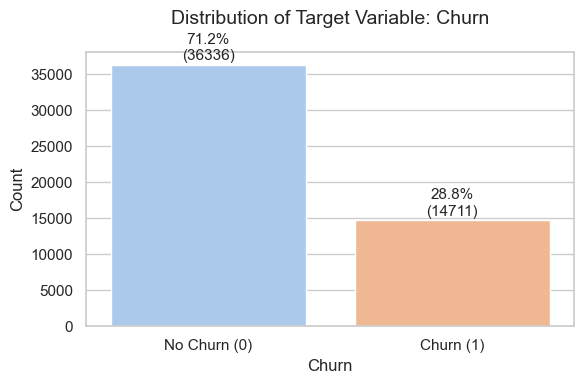

In [113]:
sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', palette='pastel')


total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%\n({count})',
                (p.get_x() + p.get_width() / 2., p.get_height() + total * 0.005),
                ha='center', va='bottom', fontsize=11)


plt.title("Distribution of Target Variable: Churn", fontsize=14, pad=20)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Churn (0)", "Churn (1)"])

plt.tight_layout()
plt.show()

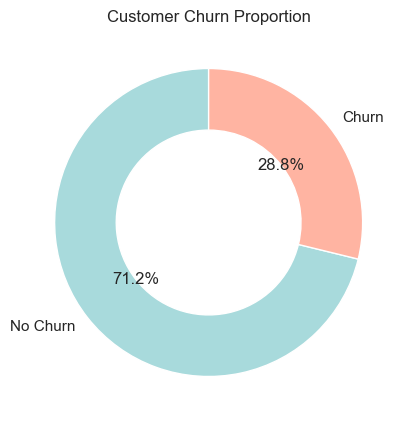

In [114]:
churn_counts = df['Churn'].value_counts()
labels = ['No Churn', 'Churn'] if 0 in churn_counts.index else ['Churn', 'No Churn']


plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=labels, colors=['#A8DADC', '#FFB4A2'], 
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Customer Churn Proportion")
plt.show()


# 3. Descriptive Statistics

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
Churn,51047.0,2.881854e-01,0.452922,0.00,0.00,0.00,1.000,1.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50


In [116]:
import pandas as pd

# 數值變數（含 Churn）
selected_num_vars = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'MonthlyMinutes', 'OverageMinutes',
    'PercChangeRevenues', 'DroppedCalls', 'DroppedBlockedCalls',
    'InboundCalls', 'OutboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
    'RetentionCalls', 'RetentionOffersAccepted', 'MonthsInService', 'CurrentEquipmentDays', 'Churn'
]

# 敘述統計（整體）
desc_all = df[selected_num_vars].describe().T
desc_all['missing_rate'] = df[selected_num_vars].isnull().mean()
print("Overall descriptive statistics (including missing rate)")
display(desc_all.round(2))

# 按 Churn 分組統計
desc_by_churn = df.groupby("Churn")[selected_num_vars[:-1]].agg(['mean', 'std', 'median', 'min', 'max'])
print("\n Grouped by Churn (mean, median, etc.)")
display(desc_by_churn.round(2))


Overall descriptive statistics (including missing rate)


,count,mean,std,min,25%,50%,75%,max,missing_rate
MonthlyRevenue,50891.0,58.83,44.51,-6.17,33.61,48.46,71.06,1223.38,0.00
TotalRecurringCharge,50891.0,46.83,23.85,-11.00,30.00,45.00,60.00,400.00,0.00
MonthlyMinutes,50891.0,525.65,529.87,0.00,158.00,366.00,723.00,7359.00,0.00
OverageMinutes,50891.0,40.03,96.59,0.00,0.00,3.00,41.00,4321.00,0.00
PercChangeRevenues,50680.0,-1.19,39.57,-1107.70,-7.10,-0.30,1.60,2483.50,0.01
DroppedCalls,51047.0,6.01,9.04,0.00,0.70,3.00,7.70,221.70,0.00
DroppedBlockedCalls,51047.0,10.16,15.56,0.00,1.70,5.30,12.30,411.70,0.00
InboundCalls,51047.0,8.18,16.67,0.00,0.00,2.00,9.30,519.30,0.00
OutboundCalls,51047.0,25.38,35.21,0.00,3.30,13.70,34.00,644.30,0.00
PeakCallsInOut,51047.0,90.55,104.95,0.00,23.00,62.00,121.30,2090.70,0.00



 Grouped by Churn (mean, median, etc.)


MonthlyRevenue                              TotalRecurringCharge         \
                mean    std median   min      max                 mean    std   
Churn                                                                           
0              59.17  44.50  48.82 -6.17  1223.38                47.76  24.13   
1              58.00  44.51  47.52  0.00   861.11                44.53  22.99   

                           ... MonthsInService                       \
      median   min    max  ...            mean   std median min max   
Churn                      ...                                        
0       45.0  -9.0  400.0  ...           18.64  9.98   16.0   6  60   
1       44.0 -11.0  338.0  ...           19.04  9.34   17.0   6  61   

      CurrentEquipmentDays                              
                      mean     std median  min     max  
Churn                                                   
0                    363.8  249.33  310.0 -5.0  1812.0  
1                    421.9  259.94  366.0 -4.0  1779.0  

[2 rows x 75 columns]

In [117]:
# 類別變數
# 類別變數清單
selected_cat_vars = [
    'HasCreditCard', 'OwnsComputer', 'Homeownership', 'MaritalStatus',
    'Occupation', 'IncomeGroup', 'ChildrenInHH',
    'HandsetWebCapable', 'HandsetRefurbished', 'HandsetPrice',
    'NewCellphoneUser', 'RespondsToMailOffers', 'OptOutMailings',
    'MadeCallToRetentionTeam', 'NonUSTravel'
]

summary_cat = {}

print("📋 類別變數分組頻率、流失率與總體佔比\n")

# 總樣本數
total_n = len(df)

for col in selected_cat_vars:
    grouped = df.groupby(col)['Churn'].agg(
        count='count',
        churn_rate='mean'
    )

    # 加上佔整體樣本比例
    grouped['percent_of_total'] = (grouped['count'] / total_n) * 100

    # 排序
    grouped = grouped.sort_values('churn_rate', ascending=False)

    summary_cat[col] = grouped

    print(f"\n {col} grouped statistics")
    display(grouped.style.format({
        'churn_rate': '{:.1%}',
        'percent_of_total': '{:.1f}%'
    }))



📋 類別變數分組頻率、流失率與總體佔比


 HasCreditCard grouped statistics


,count,churn_rate,percent_of_total
HasCreditCard,,,
No,16544,29.4%,32.4%
Yes,34503,28.5%,67.6%



 OwnsComputer grouped statistics


,count,churn_rate,percent_of_total
OwnsComputer,,,
No,41583,28.9%,81.5%
Yes,9464,28.6%,18.5%



 Homeownership grouped statistics


,count,churn_rate,percent_of_total
Homeownership,,,
Unknown,17060,29.7%,33.4%
Known,33987,28.4%,66.6%



 MaritalStatus grouped statistics


,count,churn_rate,percent_of_total
MaritalStatus,,,
Unknown,19700,30.2%,38.6%
Yes,18651,28.5%,36.5%
No,12696,27.1%,24.9%



 Occupation grouped statistics


,count,churn_rate,percent_of_total
Occupation,,,
Homemaker,157,32.5%,0.3%
Student,381,31.0%,0.7%
Clerical,986,29.3%,1.9%
Other,37637,29.0%,73.7%
Professional,8755,28.2%,17.2%
Crafts,1519,28.0%,3.0%
Self,879,27.6%,1.7%
Retired,733,25.2%,1.4%



 IncomeGroup grouped statistics


,count,churn_rate,percent_of_total
IncomeGroup,,,
0,12835,30.2%,25.1%
7,5877,29.8%,11.5%
2,1198,29.6%,2.3%
1,2039,29.1%,4.0%
6,9607,28.4%,18.8%
5,4262,28.3%,8.3%
9,5563,28.2%,10.9%
4,4053,27.7%,7.9%
8,2622,27.7%,5.1%



 ChildrenInHH grouped statistics


,count,churn_rate,percent_of_total
ChildrenInHH,,,
Yes,12368,29.6%,24.2%
No,38679,28.6%,75.8%



 HandsetWebCapable grouped statistics


,count,churn_rate,percent_of_total
HandsetWebCapable,,,
No,5001,37.4%,9.8%
Yes,46046,27.9%,90.2%



 HandsetRefurbished grouped statistics


,count,churn_rate,percent_of_total
HandsetRefurbished,,,
Yes,7091,32.2%,13.9%
No,43956,28.3%,86.1%



 HandsetPrice grouped statistics


,count,churn_rate,percent_of_total
HandsetPrice,,,
250,20,45.0%,0.0%
40,249,31.7%,0.5%
Unknown,28982,30.2%,56.8%
180,10,30.0%,0.0%
200,1266,28.0%,2.5%
80,1960,27.6%,3.8%
60,1776,27.5%,3.5%
150,4115,27.0%,8.1%
30,7328,27.0%,14.4%



 NewCellphoneUser grouped statistics


,count,churn_rate,percent_of_total
NewCellphoneUser,,,
No,41223,29.0%,80.8%
Yes,9824,28.1%,19.2%



 RespondsToMailOffers grouped statistics


,count,churn_rate,percent_of_total
RespondsToMailOffers,,,
No,31821,29.6%,62.3%
Yes,19226,27.5%,37.7%



 OptOutMailings grouped statistics


,count,churn_rate,percent_of_total
OptOutMailings,,,
Yes,752,28.9%,1.5%
No,50295,28.8%,98.5%



 MadeCallToRetentionTeam grouped statistics


,count,churn_rate,percent_of_total
MadeCallToRetentionTeam,,,
Yes,1745,45.0%,3.4%
No,49302,28.2%,96.6%



 NonUSTravel grouped statistics


,count,churn_rate,percent_of_total
NonUSTravel,,,
No,48168,28.9%,94.4%
Yes,2879,28.3%,5.6%


# 4. Remove Negative Values from Non-Negative Features

In [118]:

non_negative_cols = [
    'MonthlyRevenue', 'MonthlyMinutes', 'OverageMinutes',
    'TotalRecurringCharge', 'DirectorAssistedCalls', 'RoamingCalls',
    'DroppedCalls', 'UnansweredCalls', 'CustomerCareCalls',
    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut', 'CallWaitingCalls',
    'Handsets', 'CurrentEquipmentDays', 'RetentionCalls',
    'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
    'AdjustmentsToCreditRating'
]

for col in non_negative_cols:
    if col in df.columns:
        num_neg = (df[col] < 0).sum()
        if num_neg > 0:
            print(f"{col} has {num_neg} negative values")
    else:
        print(f"❗ Warning: {col} not found in df.columns")


MonthlyRevenue has 3 negative values
TotalRecurringCharge has 8 negative values
CurrentEquipmentDays has 76 negative values


In [119]:
# delete invalid negetive value
cols_with_negatives = ['MonthlyRevenue', 'TotalRecurringCharge', 'CurrentEquipmentDays']

for col in cols_with_negatives:
    df = df[df[col] >= 0].copy()  # 僅保留非負值觀測，並建立新 DataFrame

print("📌 After removing negatives:")
for col in cols_with_negatives:
    print(f"{col}: {(df[col] < 0).sum()} negative values remaining")

📌 After removing negatives:
MonthlyRevenue: 0 negative values remaining
TotalRecurringCharge: 0 negative values remaining
CurrentEquipmentDays: 0 negative values remaining


# Initial cleaning

In [120]:
cols_to_check = ['ThreewayCalls', 'ReferralsMadeBySubscriber']

for col in cols_to_check:
    print(f"\n📊 變數：{col}")
    print(df[col].value_counts(dropna=False).sort_index())
    print(df[col].describe())
# ThreewayCalls
# 超過七成樣本是 0，表示大部分人根本沒用過。
# 雖然不是常數，但高度偏態，右尾極長，在圖上會非常擠。
# 即使 log-transform，效果也有限，且容易讓模型噪音變多。
# 這種特徵通常在特定小族群才發生行為，對 churn 模型整體幫助小，容易造成過擬合。


# ReferralsMadeBySubscriber
# 幾乎沒人推薦別人來，說明這變數對整體 churn 沒太大貢獻。

# 是個極度偏態的離散變數，基本上是類別變數（0 vs 1）。

# 雖然理論上推薦可能代表忠誠度，但目前數據顯示這類顧客太少。


📊 變數：ThreewayCalls
ThreewayCalls
0.0     36943
0.3      6092
0.7      3174
1.0      1385
1.3       893
        ...  
31.3        1
39.3        1
43.0        1
65.3        1
66.0        1
Name: count, Length: 77, dtype: int64
count    50805.000000
mean         0.297288
std          1.150467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max         66.000000
Name: ThreewayCalls, dtype: float64

📊 變數：ReferralsMadeBySubscriber
ReferralsMadeBySubscriber
0     48424
1      2241
2       100
3        21
4         6
5         2
6         4
7         2
8         1
9         1
11        1
16        1
35        1
Name: count, dtype: int64
count    50805.000000
mean         0.052259
std          0.308217
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: ReferralsMadeBySubscriber, dtype: float64


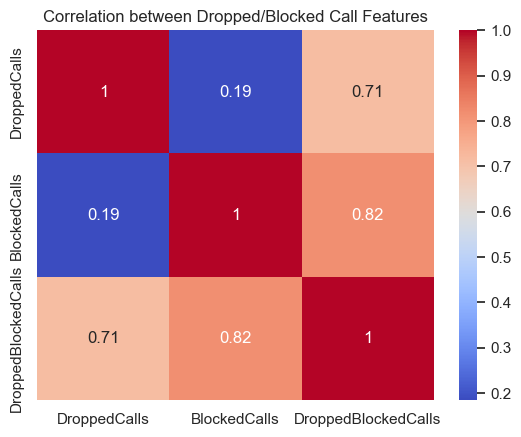

In [121]:
sns.heatmap(df[["DroppedCalls", "BlockedCalls", "DroppedBlockedCalls"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Dropped/Blocked Call Features")
plt.show()


In [122]:
cols_to_drop = ['ThreewayCalls', 'NotNewCellphoneUser', 'CustomerID', 'BlockedCalls']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")


Dropped columns: ['ThreewayCalls', 'NotNewCellphoneUser', 'CustomerID', 'BlockedCalls']


# Distinguish cat and num variables

In [123]:
# 假設你已經轉換 Churn 為數值欄位叫 Churn
# 先手動列出那些雖然是數字型態但實際是分類變數的欄位
cat_features_with_numeric_dtype = [
    'IncomeGroup', 'CreditRating', 'HandsetPrice', 'PrizmCode', 'Occupation', 'HandsetModels'
]

# 取出純數值型欄位（排除上面那些實際是分類的欄位）
numeric_df = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col not in cat_features_with_numeric_dtype and col != 'Churn'
]

# 類別變數：從所有欄位中移除數值變數與目標變數
categorical_cols = list(df.columns.difference(numeric_df + ['Churn']))

# 顯示分類結果
print("🔢 數值變數（Numerical Features）:")
print(numeric_df, "\nCount =", len(numeric_df))

print("\n🔠 類別變數（Categorical Features）:")
print(categorical_cols, "\nCount =", len(categorical_cols))

# ➕ 擴充用：可以建立 feature type 標籤表（可選）
feature_type_df = pd.DataFrame({
    "Feature": numeric_df + categorical_cols,
    "Type": ["Numerical"] * len(numeric_df) + ["Categorical"] * len(categorical_cols)
})


🔢 數值變數（Numerical Features）:
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating'] 
Count = 30

🔠 類別變數（Categorical Features）:
['BuysViaMailOrder', 'ChildrenInHH', 'CreditRating', 'HandsetModels', 'HandsetPrice', 'HandsetRefurbished', 'HandsetWebCapable', 'HasCreditCard', 'Homeownership', 'IncomeGroup', 'MadeCallToRetentionTeam', 'MaritalStatus', 'NewCellphoneUser', 'NonUSTravel', 'Occupation', 'OptOutMailings', 'OwnsComputer', 'OwnsMotorcycle', 'PrizmCode', 'RVOwner', 'R

# 找出含大量 0 的數值變數

📉 數值欄位中含有大量 0 的特徵（例如 > 50% 為 0）:
CallForwardingCalls          0.995394
RetentionOffersAccepted      0.982797
RetentionCalls               0.966007
AdjustmentsToCreditRating    0.964177
ReferralsMadeBySubscriber    0.953135
RoamingCalls                 0.686724
CustomerCareCalls            0.548509
AgeHH2                       0.510855
dtype: float64


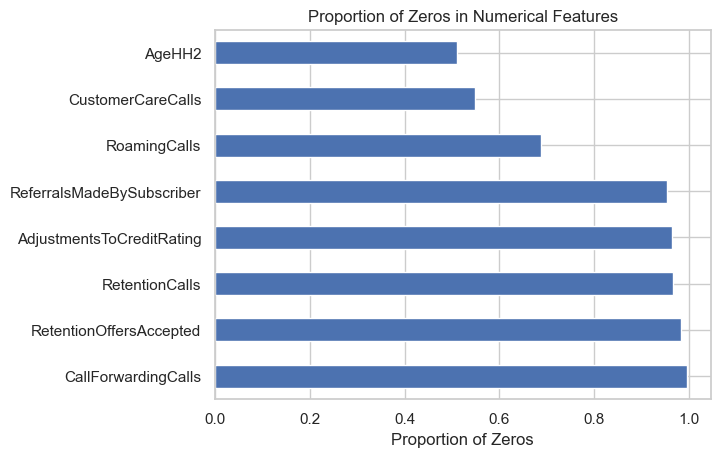

In [124]:
# 計算每個數值欄位中 0 的比例
zero_ratio_df = df[numeric_df].apply(lambda col: (col == 0).sum() / len(col))

# 篩選出 0 比例大於 50% 的欄位（你可以調整門檻）
sparse_numeric_features = zero_ratio_df[zero_ratio_df > 0.5].sort_values(ascending=False)

# 顯示結果
print("📉 數值欄位中含有大量 0 的特徵（例如 > 50% 為 0）:")
print(sparse_numeric_features)

# 如果你想畫圖視覺化：
import matplotlib.pyplot as plt
sparse_numeric_features.plot(kind='barh', title='Proportion of Zeros in Numerical Features')
plt.xlabel('Proportion of Zeros')
plt.show()


In [125]:
# 找出幾乎為 0 的欄位（例如超過 95% 為 0，mean 又非常小）
sparse_zero_like = df[numeric_df].apply(lambda col: ((col == 0).sum() / len(col) > 0.95) and abs(col.mean()) < 1)

print("🚫 可視為近乎無訊號的特徵:")
print(sparse_zero_like[sparse_zero_like].index.tolist())


🚫 可視為近乎無訊號的特徵:
['CallForwardingCalls', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating']


# 5. Correlation Heatmap

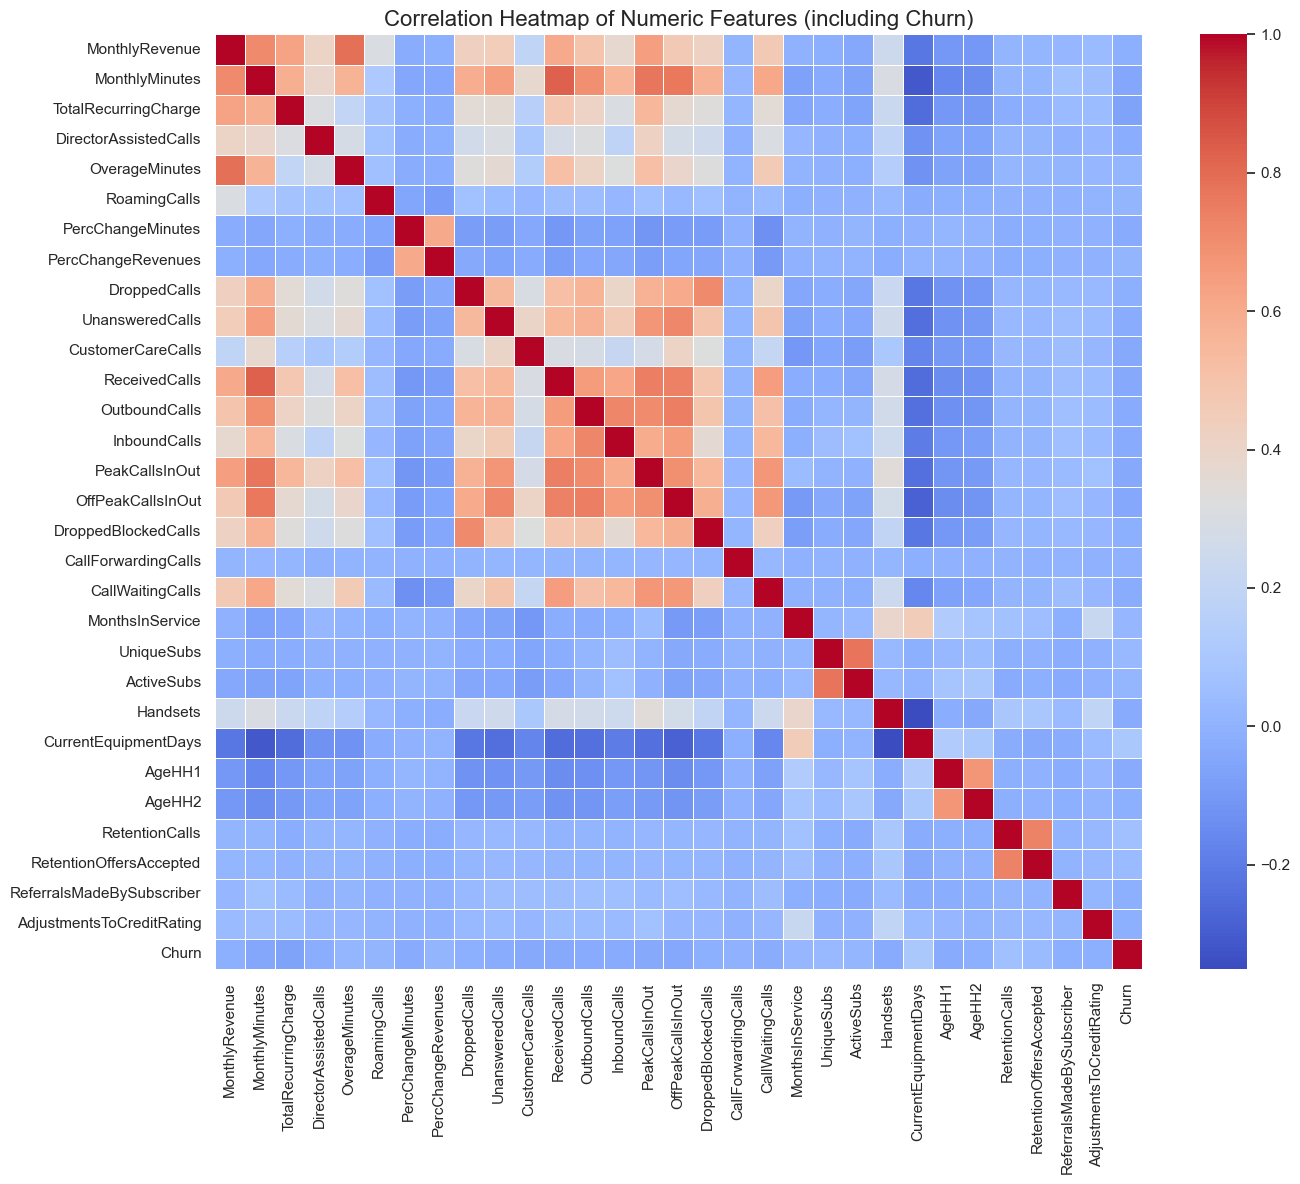

In [126]:
# 從 df 中選出數值欄位，並計算相關係數矩陣
# Create a new DataFrame containing only the true numerical features and the target variable
numeric_data = df[numeric_df + ['Churn']]


# 畫出 heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (including Churn)", fontsize=16)
plt.tight_layout()
plt.show()

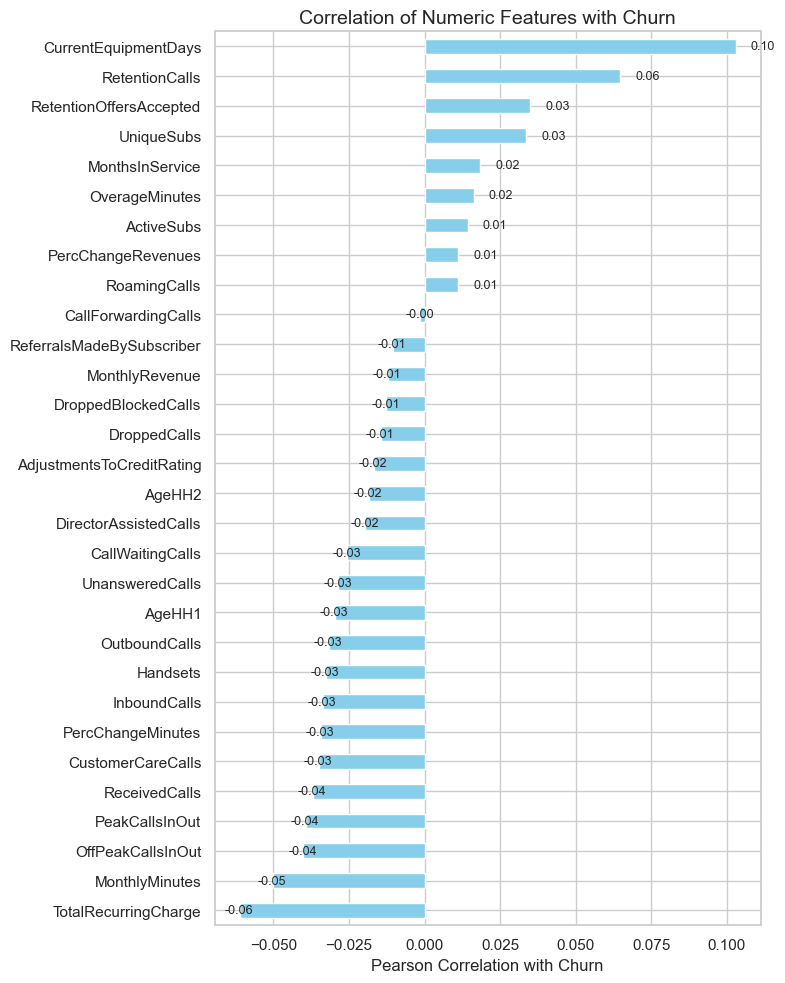

In [127]:
churn_corr = numeric_data.corr()['Churn'].drop('Churn')

plt.figure(figsize=(8, 10))
ax = churn_corr.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Add correlation values at the end of bars
for i, (feature, corr_value) in enumerate(churn_corr.sort_values(ascending=True).items()):
    ax.text(corr_value + 0.005 * np.sign(corr_value), i, f"{corr_value:.2f}", va='center', fontsize=9)

plt.title("Correlation of Numeric Features with Churn", fontsize=14)
plt.xlabel("Pearson Correlation with Churn")
plt.tight_layout()
plt.show()

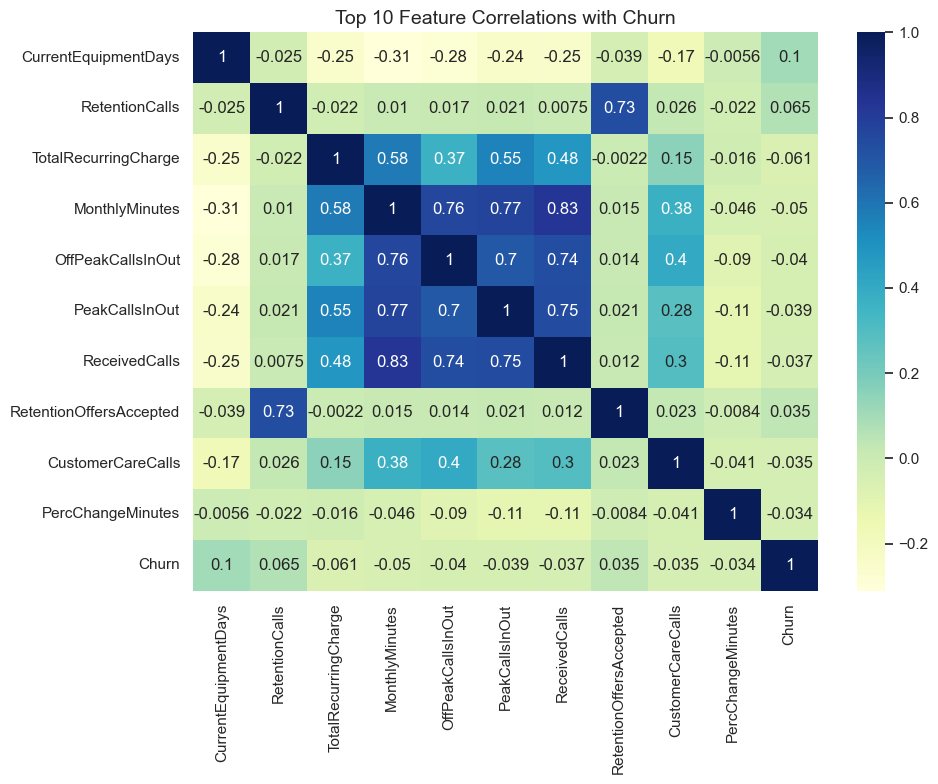

In [128]:

# Filter top 10 features most correlated with Churn using the correct numeric data
# This now correctly excludes 'HandsetModels' and other specified categorical features
correlation = numeric_data.corr()['Churn'].abs().sort_values(ascending=False).drop('Churn')
top_features = correlation.head(10).index.tolist()

# Create the heatmap with the correctly identified top features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['Churn']].corr(), annot=True, cmap='YlGnBu')
plt.title('Top 10 Feature Correlations with Churn', fontsize=14)
plt.tight_layout()
plt.show()


In [129]:
#Investigate unique categories
uniques_df = pd.DataFrame({
    "Column": df.columns,
    "Unique Values": [df[col].nunique(dropna=False) for col in df.columns],
    "Data Type": [df[col].dtype for col in df.columns]
})

uniques_df.sort_values(by="Unique Values", ascending=False, inplace=True)
uniques_df.reset_index(drop=True, inplace=True)

print(uniques_df)  # or just use print(uniques_df)

                       Column  Unique Values Data Type
0              MonthlyRevenue          12648   float64
1               ReceivedCalls           6103   float64
2          PercChangeRevenues           2896   float64
3              MonthlyMinutes           2713   float64
4           PercChangeMinutes           2260   float64
5              PeakCallsInOut           1835   float64
6           OffPeakCallsInOut           1663   float64
7        CurrentEquipmentDays           1428   float64
8             UnansweredCalls            839   float64
9               OutboundCalls            786   float64
10                ServiceArea            748    object
11             OverageMinutes            746   float64
12               RoamingCalls            529   float64
13               InboundCalls            471   float64
14        DroppedBlockedCalls            447   float64
15               DroppedCalls            285   float64
16           CallWaitingCalls            222   float64
17       T

In [130]:
# Investigate unique categories for the columns in categorical_cols
uniques_df = pd.DataFrame({
    "Column": categorical_cols,
    "Unique Values": [df[col].nunique(dropna=False) for col in categorical_cols],
    "Data Type": [df[col].dtype for col in categorical_cols]
})

# Sort the DataFrame by the number of unique values in descending order
uniques_df.sort_values(by="Unique Values", ascending=False, inplace=True)
uniques_df.reset_index(drop=True, inplace=True)

# Display the result
print(uniques_df)

                     Column  Unique Values Data Type
0               ServiceArea            748    object
1              HandsetPrice             16    object
2             HandsetModels             13   float64
3               IncomeGroup             10     int64
4                Occupation              8    object
5              CreditRating              7    object
6                 PrizmCode              4    object
7             MaritalStatus              3    object
8      RespondsToMailOffers              2    object
9                   RVOwner              2    object
10           OwnsMotorcycle              2    object
11             OwnsComputer              2    object
12           OptOutMailings              2    object
13         BuysViaMailOrder              2    object
14              NonUSTravel              2    object
15         NewCellphoneUser              2    object
16             ChildrenInHH              2    object
17  MadeCallToRetentionTeam              2    

In [131]:
print(df['CreditRating'].value_counts())

CreditRating
2-High       18973
1-Highest     8451
3-Good        8380
5-Low         6437
4-Medium      5333
7-Lowest      2093
6-VeryLow     1138
Name: count, dtype: int64


In [132]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # select all numeric columns（float64 和 int64）
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df[numeric_cols], orient='h')
# plt.title("Boxplot of Numeric Features (check for outliers)", fontsize=14)
# plt.tight_layout()
# plt.show()


In [133]:
# 先對 ServiceArea 欄位進行分類計數
service_area_counts = df['ServiceArea'].value_counts()

# 再轉換為 dataframe 格式
service_area_df = service_area_counts.reset_index()
service_area_df.columns = ['ServiceArea', 'Count']
print(service_area_df)


    ServiceArea  Count
0     NYCBRO917   1679
1     HOUHOU281   1508
2     DALDAL214   1496
3     NYCMAN917   1177
4     APCFCH703    781
..          ...    ...
742   OHIRAV330      1
743   OMANEW515      1
744   KCYHES316      1
745   AIRGEO843      1
746   NCRDNN910      1

[747 rows x 2 columns]


In [134]:
# Check HandsetPrice visualization
print("HandsetPrice category distribution:")
print(df['HandsetPrice'].value_counts(dropna=False))


HandsetPrice category distribution:
HandsetPrice
Unknown    28914
30          7268
150         4086
130         2090
80          1938
10          1916
60          1761
200         1257
100         1226
40           247
400           46
250           19
300           13
180           10
500            8
240            6
Name: count, dtype: int64


/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1571343935.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1571343935.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1571343935.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1571343935.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

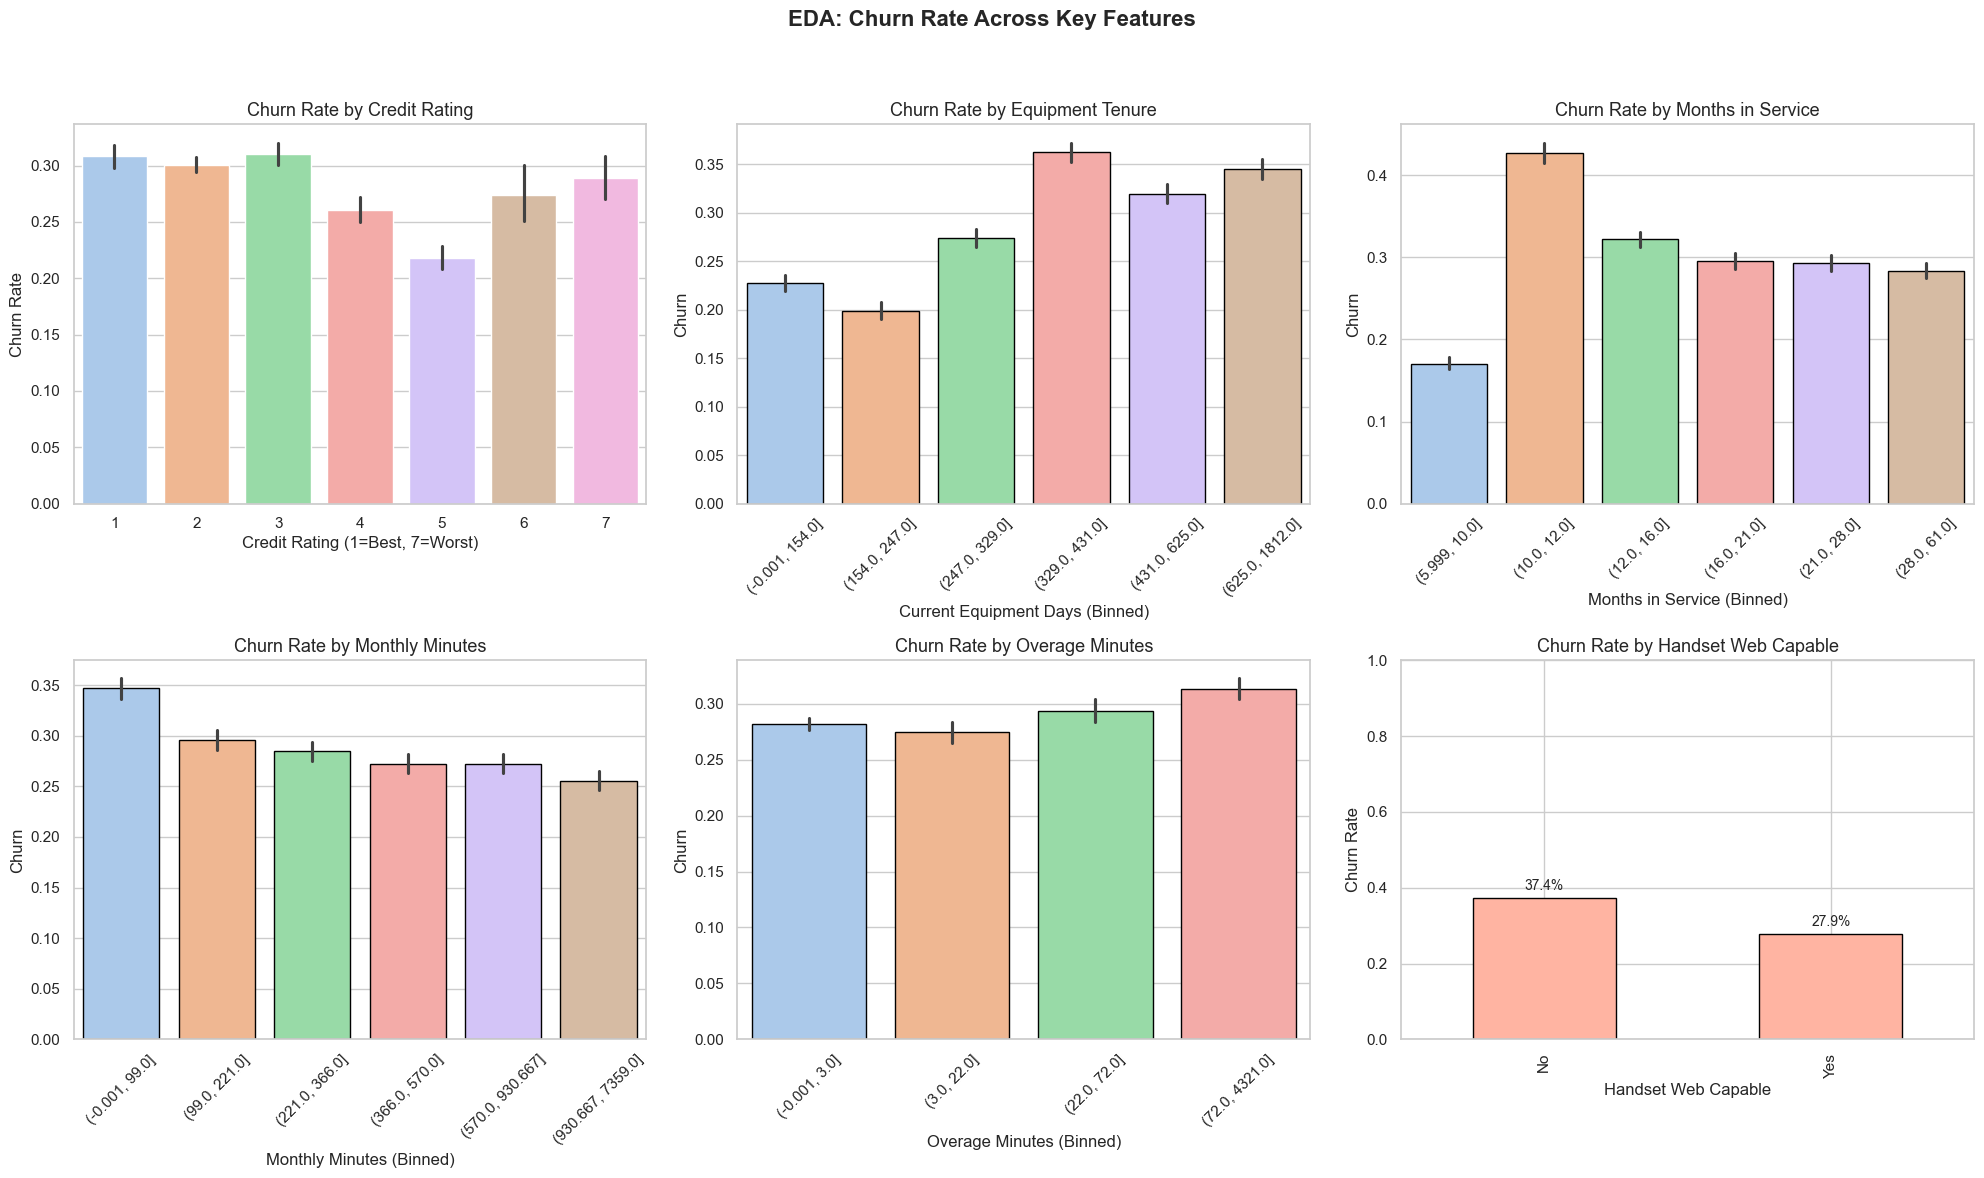

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 信用評分對照（數值排序）
credit_mapping = {
    '1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4,
    '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7
}

# 建立畫布
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# 1️⃣ Credit Rating → 整理後用數值排序畫圖
df_credit = df[['CreditRating', 'Churn']].copy()
df_credit['CreditRatingNum'] = df_credit['CreditRating'].map(credit_mapping)

sns.barplot(
    data=df_credit,
    x='CreditRatingNum',
    y='Churn',
    ax=axes[0],
    palette='pastel'
)
axes[0].set_title("Churn Rate by Credit Rating", fontsize=13)
axes[0].set_xlabel("Credit Rating (1=Best, 7=Worst)")
axes[0].set_ylabel("Churn Rate")

# 2️⃣ CurrentEquipmentDays 分箱
df['CurrentEquipmentDays_bin'] = pd.qcut(df['CurrentEquipmentDays'], q=6, duplicates="drop")
sns.barplot(
    x='CurrentEquipmentDays_bin',
    y='Churn',
    data=df,
    palette='pastel',
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title("Churn Rate by Equipment Tenure", fontsize=13)
axes[1].set_xlabel("Current Equipment Days (Binned)")
axes[1].tick_params(axis='x', rotation=45)

# 3️⃣ MonthsInService 分箱
df['MonthsInService_bin'] = pd.qcut(df['MonthsInService'], q=6, duplicates="drop")
sns.barplot(
    x='MonthsInService_bin',
    y='Churn',
    data=df,
    palette='pastel',
    edgecolor='black',
    ax=axes[2]
)
axes[2].set_title("Churn Rate by Months in Service", fontsize=13)
axes[2].set_xlabel("Months in Service (Binned)")
axes[2].tick_params(axis='x', rotation=45)

# 4️⃣ MonthlyMinutes 分箱
df['MonthlyMinutes_bin'] = pd.qcut(df['MonthlyMinutes'], q=6, duplicates="drop")
sns.barplot(
    x='MonthlyMinutes_bin',
    y='Churn',
    data=df,
    palette='pastel',
    edgecolor='black',
    ax=axes[3]
)
axes[3].set_title("Churn Rate by Monthly Minutes", fontsize=13)
axes[3].set_xlabel("Monthly Minutes (Binned)")
axes[3].tick_params(axis='x', rotation=45)

# 5️⃣ OverageMinutes 分箱
df['OverageMinutes_bin'] = pd.qcut(df['OverageMinutes'], q=6, duplicates="drop")
sns.barplot(
    x='OverageMinutes_bin',
    y='Churn',
    data=df,
    palette='pastel',
    edgecolor='black',
    ax=axes[4]
)
axes[4].set_title("Churn Rate by Overage Minutes", fontsize=13)
axes[4].set_xlabel("Overage Minutes (Binned)")
axes[4].tick_params(axis='x', rotation=45)

# 6️⃣ 類別變數：HandsetWebCapable
prop_web = df.groupby('HandsetWebCapable')['Churn'].mean()
prop_web.plot(
    kind='bar',
    color='#FFB4A2',
    edgecolor='black',
    ax=axes[5]
)
axes[5].set_title("Churn Rate by Handset Web Capable", fontsize=13)
axes[5].set_xlabel("Handset Web Capable")
axes[5].set_ylabel("Churn Rate")
axes[5].set_ylim(0, 1)
for idx, val in enumerate(prop_web.index):
    axes[5].text(idx, prop_web.loc[val] + 0.02, f"{prop_web.loc[val]:.1%}", ha='center', fontsize=10)

# 調整整體 layout
plt.suptitle("EDA: Churn Rate Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# Appendix Visualizations

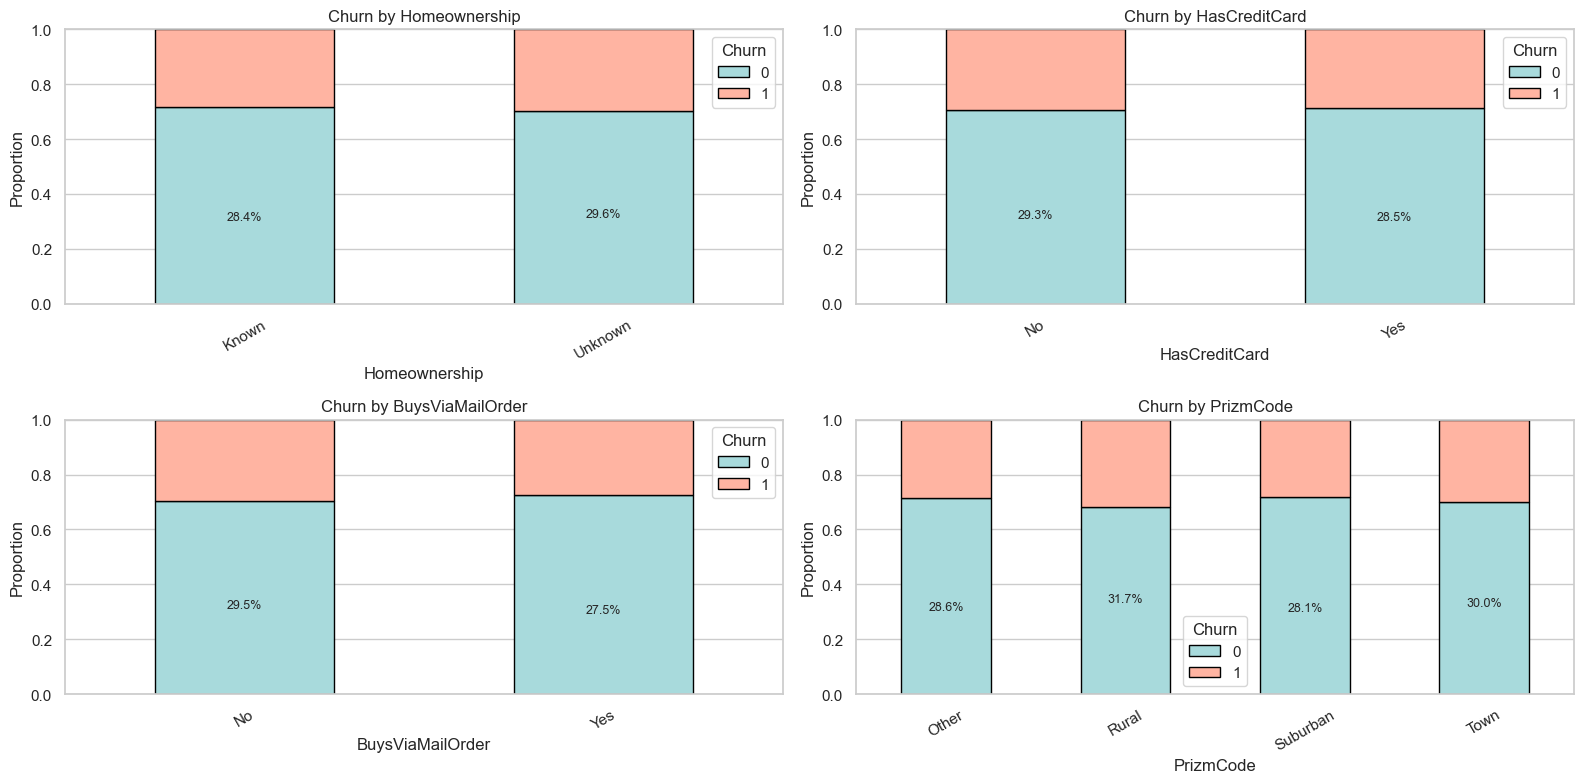

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


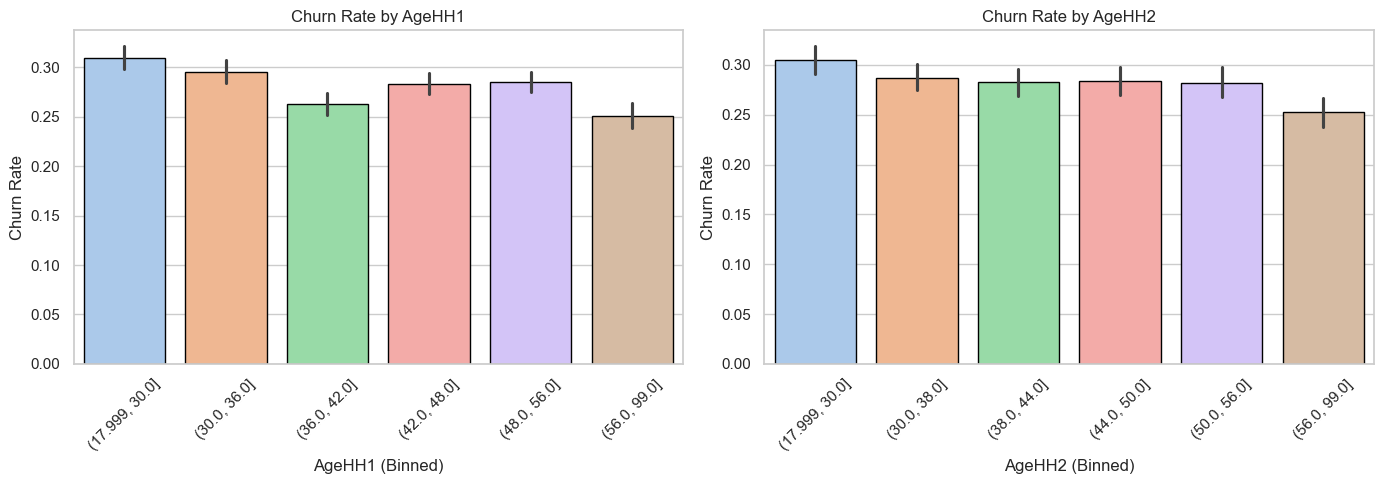

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


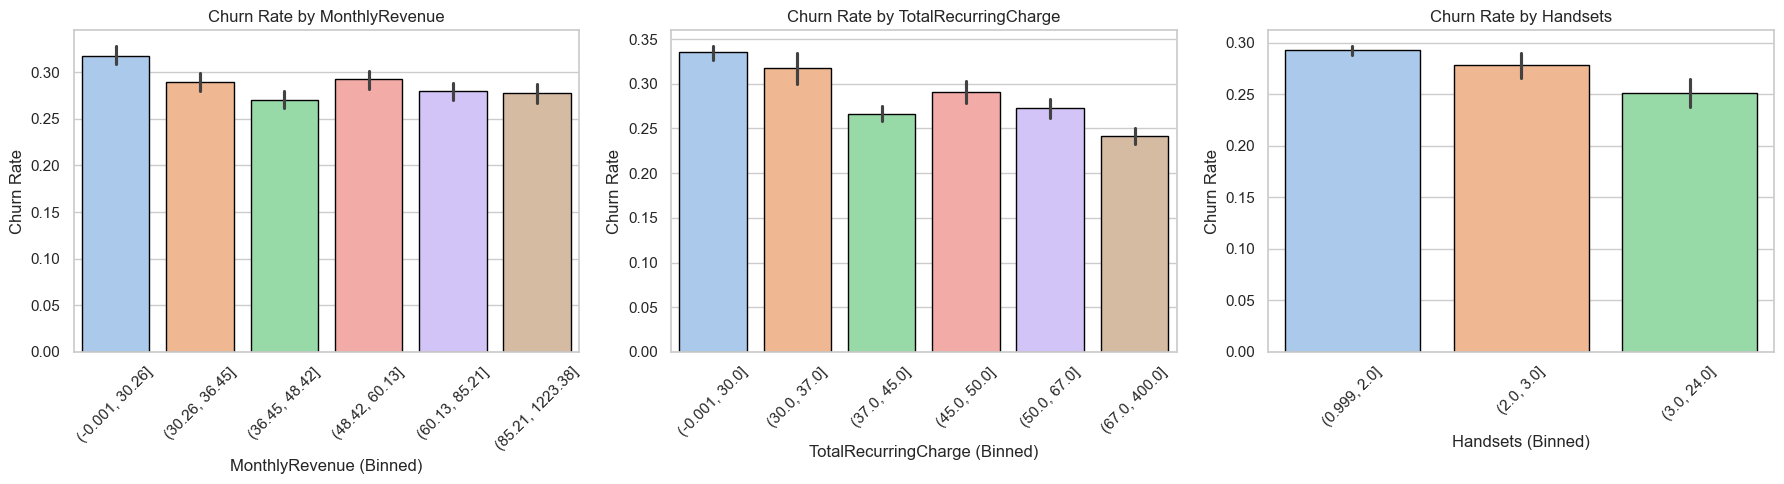

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


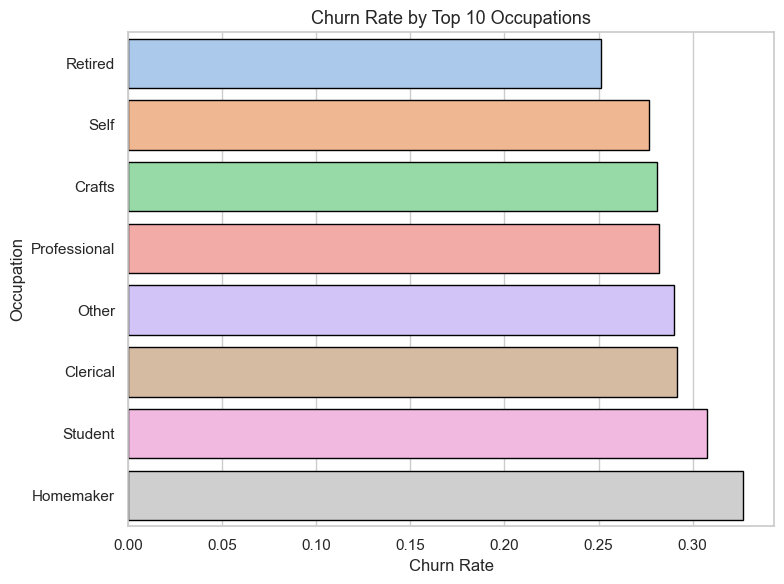

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1660204410.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


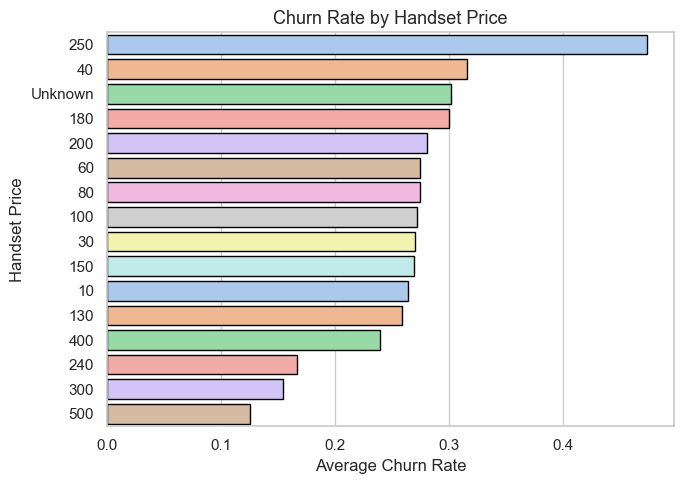

In [136]:

# Proportional stacked bar plots for categorical features EXCLUDING HandsetWebCapable
categorical_cols = [
    'Homeownership',
    'HasCreditCard',
    'BuysViaMailOrder',
    'PrizmCode'
]

plt.figure(figsize=(16, 8))
for i, col in enumerate(categorical_cols, 1):
    prop_df = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    plt.subplot(2, 2, i)
    prop_df[[0, 1]].plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        color=['#A8DADC', '#FFB4A2'],
        edgecolor='black'
    )
    plt.title(f"Churn by {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    for idx, val in enumerate(prop_df.index):
        churn_rate = prop_df.loc[val, 1]
        plt.text(idx, churn_rate + 0.02, f"{churn_rate:.1%}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Binned bar plots: AgeHH1, AgeHH2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# AgeHH1
df_age = df[df['AgeHH1'] != 0].copy()
df_age['AgeHH1_bin'] = pd.qcut(df_age['AgeHH1'], q=6, duplicates='drop')
sns.barplot(
    x='AgeHH1_bin',
    y='Churn',
    data=df_age,
    palette='pastel',
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title("Churn Rate by AgeHH1", fontsize=12)
axes[0].set_xlabel("AgeHH1 (Binned)")
axes[0].set_ylabel("Churn Rate")
axes[0].tick_params(axis='x', rotation=45)

# AgeHH2
df_age2 = df[df['AgeHH2'] != 0].copy()
df_age2['AgeHH2_bin'] = pd.qcut(df_age2['AgeHH2'], q=6, duplicates='drop')
sns.barplot(
    x='AgeHH2_bin',
    y='Churn',
    data=df_age2,
    palette='pastel',
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title("Churn Rate by AgeHH2", fontsize=12)
axes[1].set_xlabel("AgeHH2 (Binned)")
axes[1].set_ylabel("Churn Rate")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Binned bar plots for usage-related numeric features
usage_cols = [
    'MonthlyRevenue',
    'TotalRecurringCharge',
    'Handsets'
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, col in enumerate(usage_cols):
    df_tmp = df.copy()
    df_tmp[f'{col}_bin'] = pd.qcut(df_tmp[col], q=6, duplicates='drop')
    sns.barplot(
        x=f'{col}_bin',
        y='Churn',
        data=df_tmp,
        palette='pastel',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Churn Rate by {col}", fontsize=12)
    axes[i].set_xlabel(f"{col} (Binned)")
    axes[i].set_ylabel("Churn Rate")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Occupation churn rate barplot
top_occup = df['Occupation'].value_counts().nlargest(10).index
top_df = df[df['Occupation'].isin(top_occup)]
churn_rate = top_df.groupby('Occupation')['Churn'].mean().sort_values()
churn_df = churn_rate.reset_index()
churn_df.columns = ['Occupation', 'ChurnRate']

plt.figure(figsize=(8, 6))
sns.barplot(
    data=churn_df,
    y='Occupation',
    x='ChurnRate',
    palette='pastel',
    edgecolor='black'
)
plt.title("Churn Rate by Top 10 Occupations", fontsize=13)
plt.xlabel("Churn Rate")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# HandsetPrice churn rate barplot
churn_rate_handset = df.groupby('HandsetPrice')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(
    x=churn_rate_handset.values,
    y=churn_rate_handset.index,
    palette='pastel',
    edgecolor='black'
)
plt.title("Churn Rate by Handset Price", fontsize=13)
plt.xlabel("Average Churn Rate")
plt.ylabel("Handset Price")
plt.tight_layout()
plt.show()



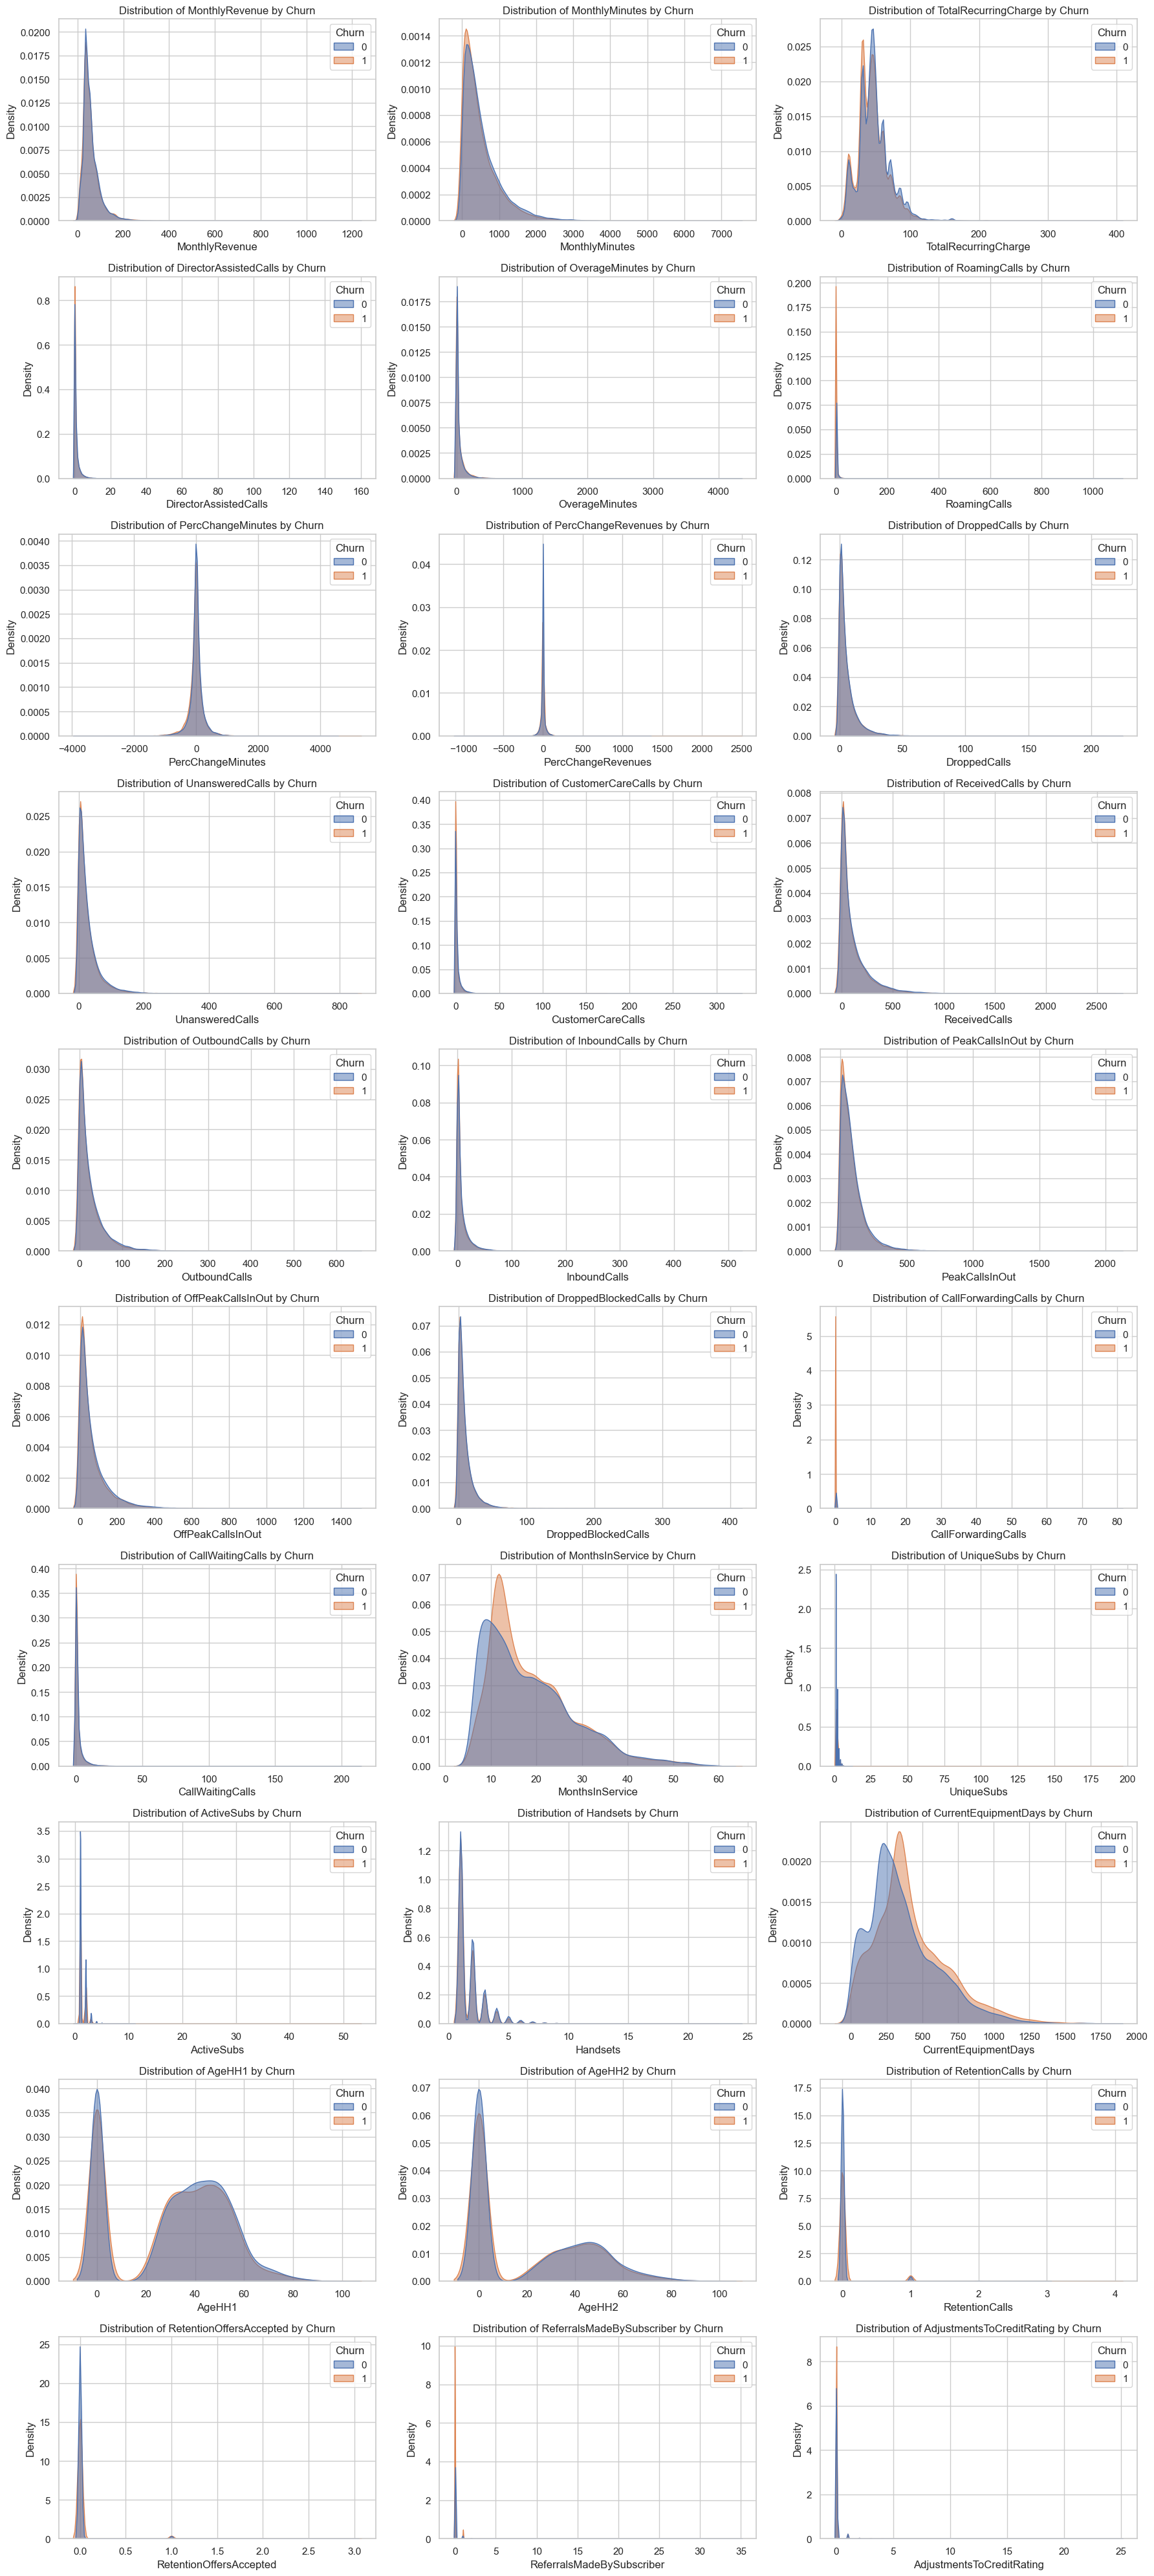

In [137]:
#Distribution of Numeric Features (Right-Tail Detection)

# 每行畫一張圖（可調整行列數）
num_cols = 3
num_rows = (len(numeric_df) + num_cols - 1) // num_cols

# 設定圖形大小
plt.figure(figsize=(num_cols * 6, num_rows * 4))

# 逐個變數畫出 KDE 分佈圖（以 Churn 分組）
for i, col in enumerate(numeric_df):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(data=numeric_data, x=col, hue='Churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Churn')
    plt.tight_layout()

plt.show()



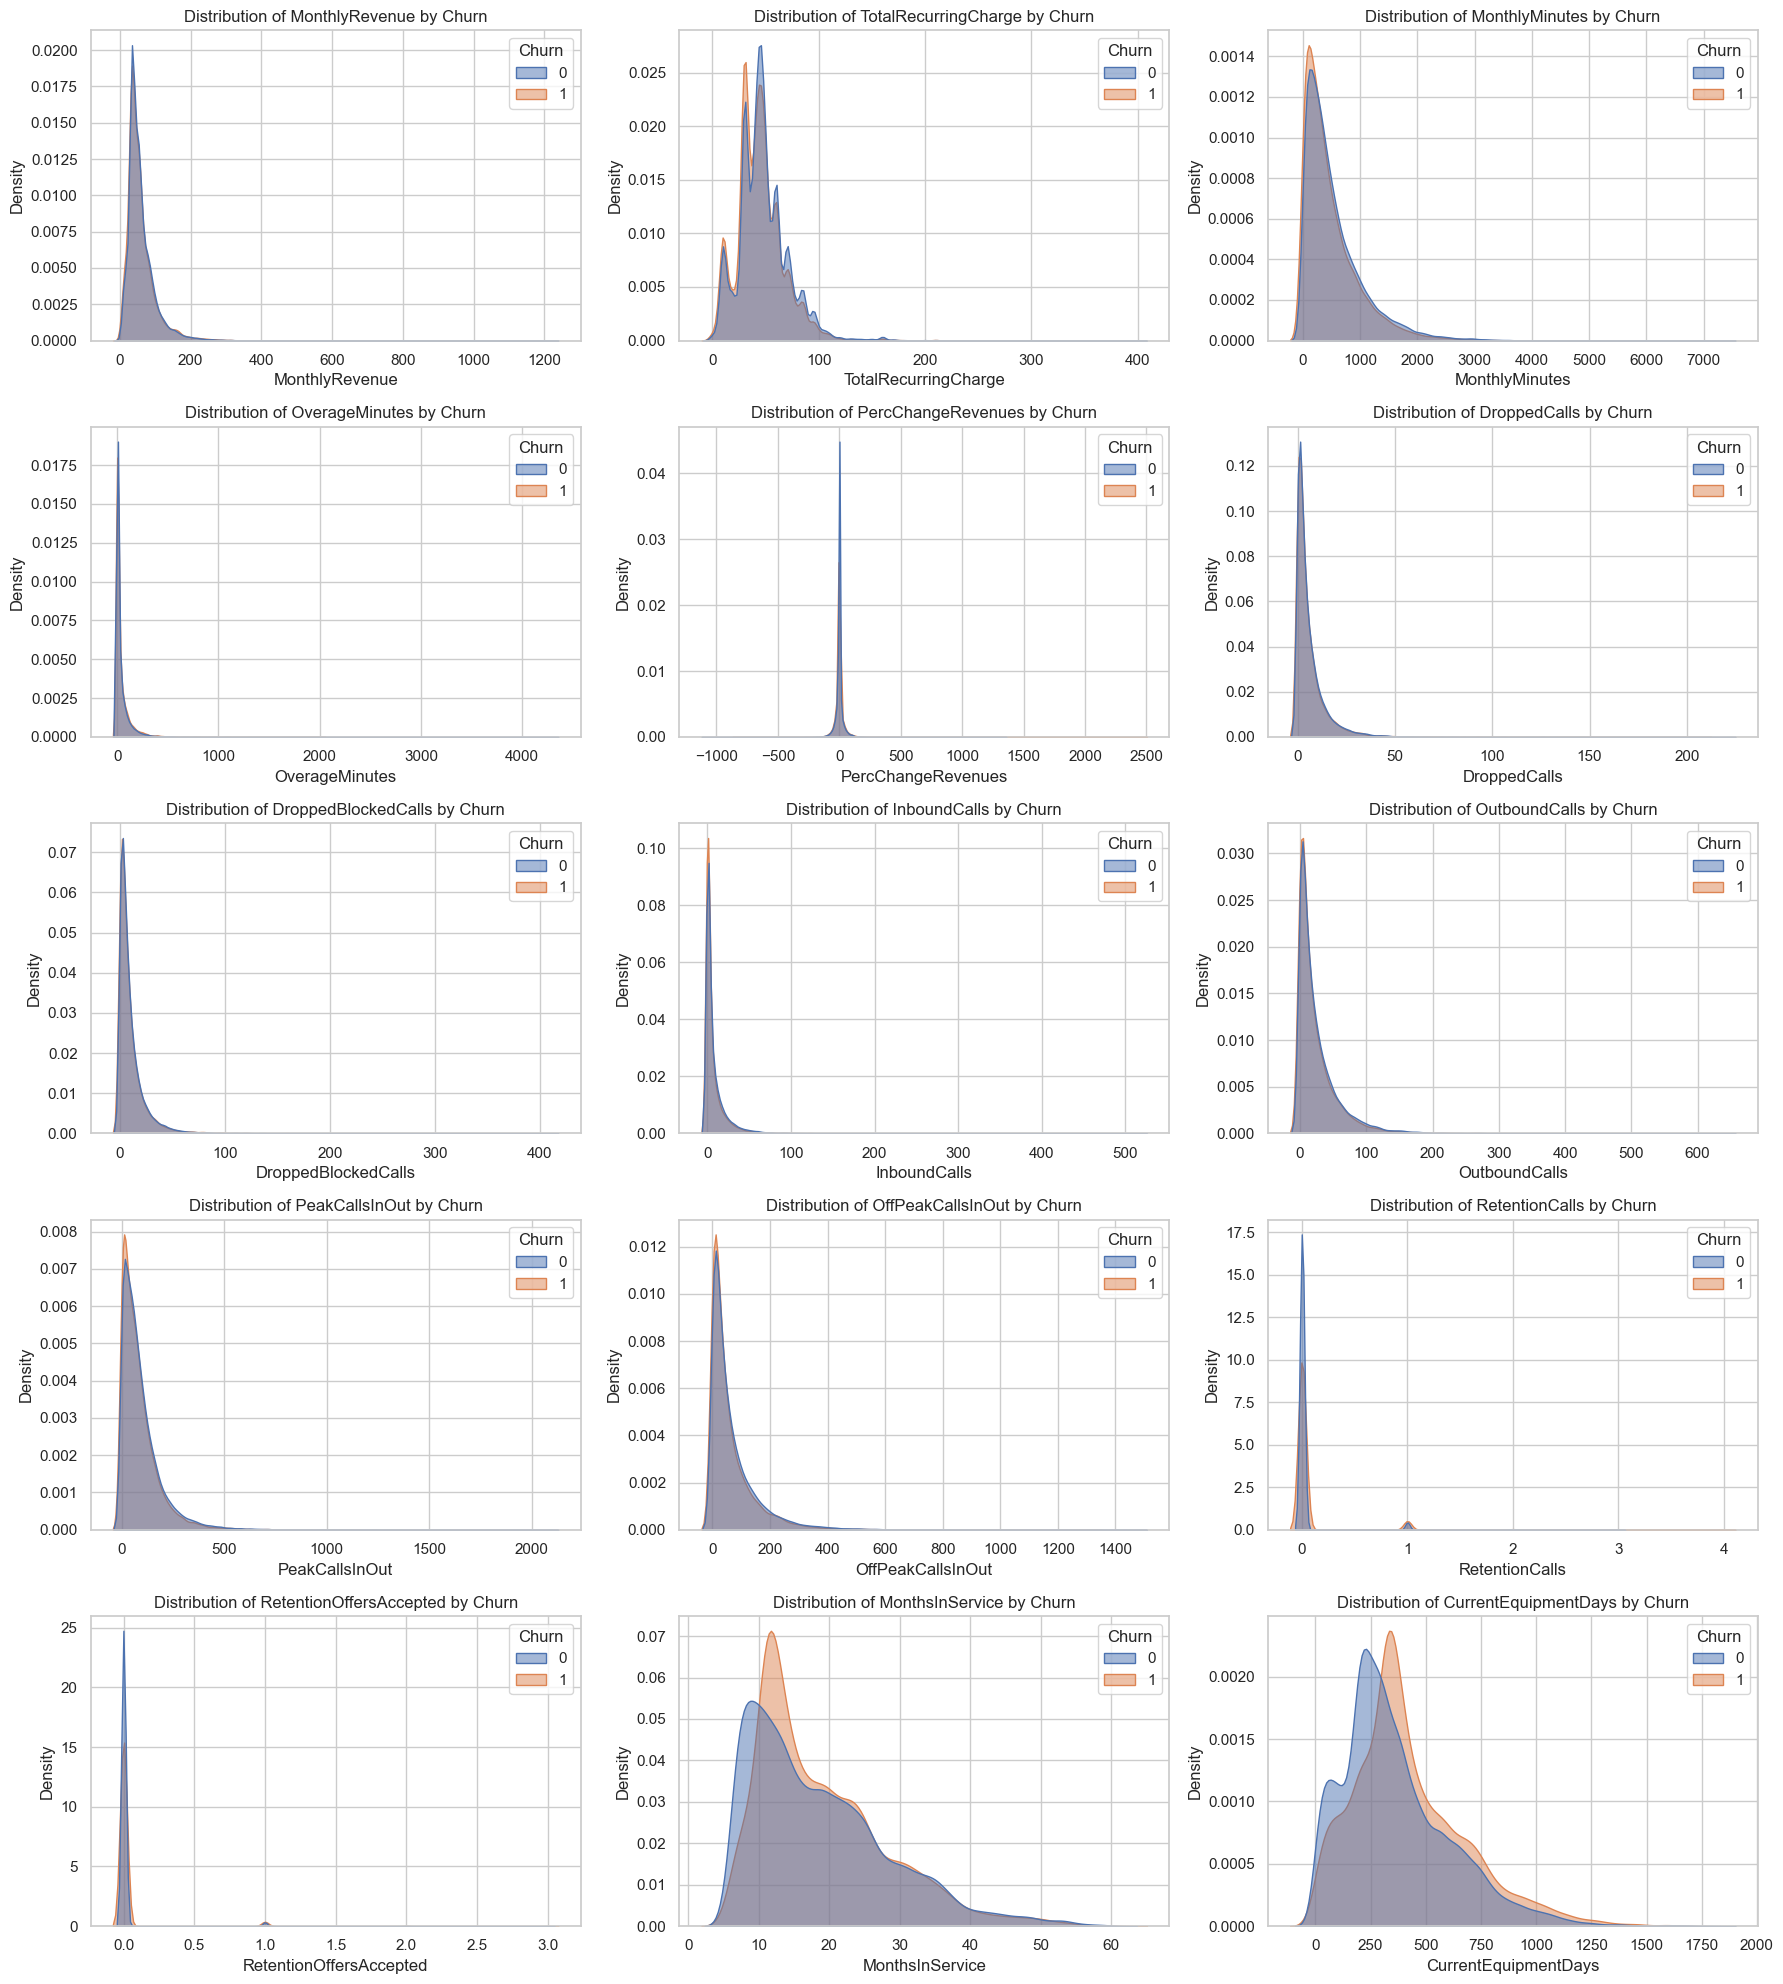

In [138]:
#selected num features

import matplotlib.pyplot as plt
import seaborn as sns

# 你挑選的數值變數
selected_num_vars = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'MonthlyMinutes', 'OverageMinutes',
    'PercChangeRevenues', 'DroppedCalls', 'DroppedBlockedCalls',
    'InboundCalls', 'OutboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
    'RetentionCalls', 'RetentionOffersAccepted', 'MonthsInService', 'CurrentEquipmentDays'
]

num_cols = 3
num_rows = (len(selected_num_vars) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 6, num_rows * 4))

for i, col in enumerate(selected_num_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Churn')

plt.tight_layout()
plt.show()



In [139]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # 類別變數
# selected_cat_vars = [
#     'HasCreditCard', 'OwnsComputer', 'Homeownership', 'MaritalStatus',
#     'Occupation', 'IncomeGroup', 'ChildrenInHH',
#     'HandsetWebCapable', 'HandsetRefurbished', 'HandsetPrice',
#     'NewCellphoneUser', 'RespondsToMailOffers', 'OptOutMailings',
#     'MadeCallToRetentionTeam', 'ServiceArea', 'NonUSTravel'
# ]

# cat_cols = 2
# cat_rows = (len(selected_cat_vars) + cat_cols - 1) // cat_cols

# fig, axs = plt.subplots(cat_rows, cat_cols, figsize=(cat_cols * 8, cat_rows * 5))
# axs = axs.flatten()

# for i, col in enumerate(selected_cat_vars):
#     # 計算每個類別的 churn 比例
#     prop_df = (
#         df.groupby(col)['Churn']
#         .value_counts(normalize=True)
#         .rename('proportion')
#         .reset_index()
#     )

#     sns.barplot(
#         data=prop_df,
#         x=col,
#         y='proportion',
#         hue='Churn',
#         ax=axs[i],
#         palette='Set2'
#     )

#     axs[i].set_title(f'Churn Rate by {col}')
#     axs[i].set_ylabel("Proportion")
#     axs[i].tick_params(axis='x', rotation=45)

# # 去掉多餘子圖
# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

# plt.tight_layout()
# plt.show()



In [140]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# selected_cat_vars = [
#     'HasCreditCard', 'OwnsComputer', 'Homeownership', 'MaritalStatus',
#     'Occupation', 'IncomeGroup', 'ChildrenInHH',
#     'HandsetWebCapable', 'HandsetRefurbished', 'HandsetPrice',
#     'NewCellphoneUser', 'RespondsToMailOffers', 'OptOutMailings',
#     'MadeCallToRetentionTeam', 'ServiceArea', 'NonUSTravel'
# ]

# cols = 2
# rows = (len(selected_cat_vars) + cols - 1) // cols
# fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 4))
# axes = axes.flatten()

# for i, col in enumerate(selected_cat_vars):
#     churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
#     sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="pastel", ax=axes[i])
#     axes[i].set_title(f'Churn Rate by {col}')
#     axes[i].set_ylabel('Churn Rate')
#     axes[i].set_xlabel(col)
#     axes[i].tick_params(axis='x', rotation=45)
    
#     # 在柱狀圖上標記數值
#     for j, val in enumerate(churn_rate.values):
#         axes[i].text(j, val + 0.01, f"{val:.1%}", ha='center', fontsize=9)

# # 移除多餘子圖（如果有的話）
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()


In [141]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # 需要的變數列表
# selected_cat_vars = [
#     'HasCreditCard', 'OwnsComputer', 'Homeownership', 'MaritalStatus',
#     'Occupation', 'IncomeGroup', 'ChildrenInHH',
#     'HandsetWebCapable', 'HandsetRefurbished', 'HandsetPrice',
#     'NewCellphoneUser', 'RespondsToMailOffers', 'OptOutMailings',
#     'MadeCallToRetentionTeam', 'ServiceArea', 'NonUSTravel'
# ]

# # 建立子圖
# cols = 2
# rows = (len(selected_cat_vars) + cols - 1) // cols
# fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))
# axes = axes.flatten()

# for i, col in enumerate(selected_cat_vars):
#     # 計算每個類別的流失率與樣本數
#     churn_rate = df.groupby(col)['Churn'].mean()
#     counts = df[col].value_counts()
#     plot_df = pd.DataFrame({'ChurnRate': churn_rate, 'Count': counts})
#     plot_df = plot_df.sort_values("ChurnRate", ascending=False)

#     # 畫條形圖（高度 = churn rate，寬度 = 樣本數）
#     bars = sns.barplot(
#         x=plot_df.index,
#         y=plot_df["ChurnRate"],
#         ax=axes[i],
#         palette="coolwarm",
#         edgecolor="black"
#     )

#     axes[i].set_title(f"Churn Rate by {col}", fontsize=12)
#     axes[i].set_ylabel("Churn Rate")
#     axes[i].set_xlabel(col)
#     axes[i].set_ylim(0, 1)
#     axes[i].tick_params(axis='x', rotation=45)

#     # 標上樣本數
#     for j, p in enumerate(bars.patches):
#         height = p.get_height()
#         width = plot_df["Count"].iloc[j]
#         axes[i].text(p.get_x() + p.get_width() / 2., height + 0.02,
#                      f"{height:.1%}\n(n={width})", ha='center', fontsize=9)

# # 移除多餘空白子圖
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# plt.suptitle("📊 Churn Rate + Sample Size by Categorical Feature", fontsize=16, fontweight="bold")
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1355804042.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1355804042.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1355804042.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_22935/1355804042.py:40: FutureWarning: 

Passing `palette` without assigning 

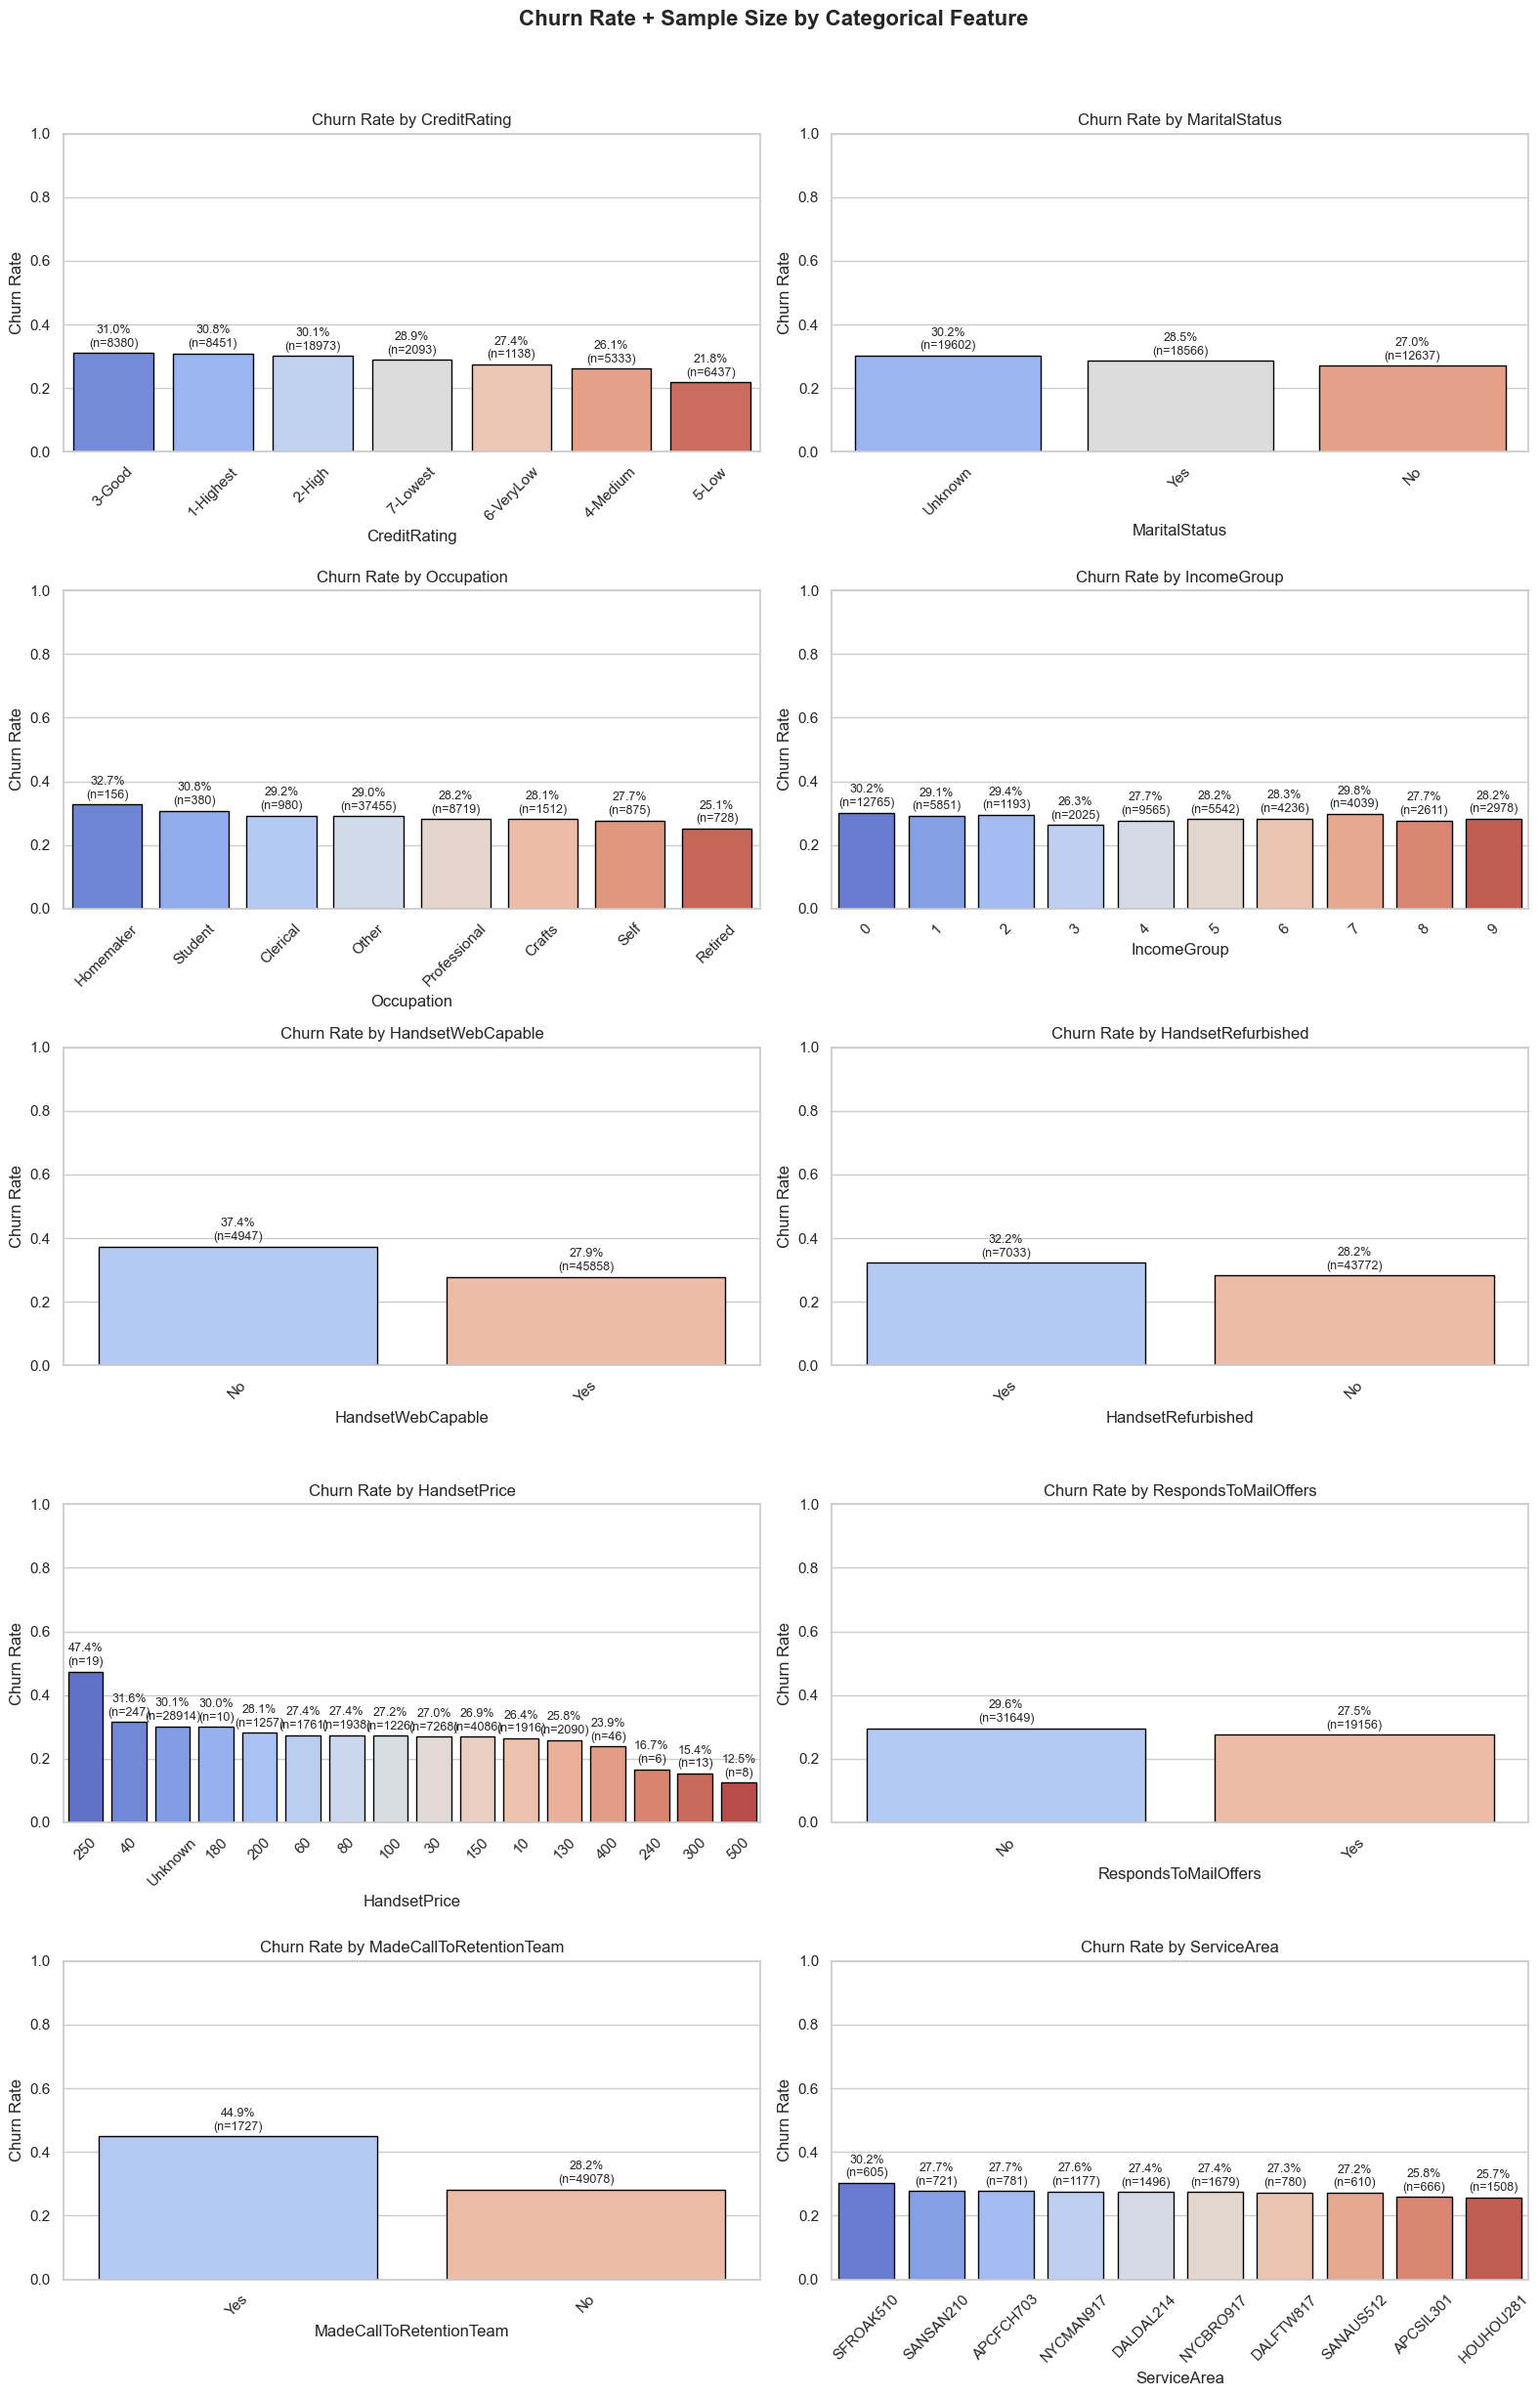

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 調整後的類別變數清單（ServiceArea 放最後）
selected_cat_vars = [
    'CreditRating', 'MaritalStatus',
    'Occupation', 'IncomeGroup',
    'HandsetWebCapable', 'HandsetRefurbished', 'HandsetPrice',
    'RespondsToMailOffers',
    'MadeCallToRetentionTeam',
    'ServiceArea'  # 👈 放在最後
]

# 建立子圖網格
cols = 2
rows = (len(selected_cat_vars) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))
axes = axes.flatten()

for i, col in enumerate(selected_cat_vars):
    if col != 'ServiceArea':
        # 通用類別變數：計算 churn rate & count
        churn_rate = df.groupby(col)['Churn'].mean()
        counts = df[col].value_counts()
        plot_df = pd.DataFrame({'ChurnRate': churn_rate, 'Count': counts})
        plot_df = plot_df.sort_values("ChurnRate", ascending=False)

    else:
        # ServiceArea：僅取樣本數最多的前 10 個區域
        topN = 10
        top_areas = df['ServiceArea'].value_counts().nlargest(topN).index
        df_sa = df[df['ServiceArea'].isin(top_areas)].copy()
        churn_rate = df_sa.groupby('ServiceArea')['Churn'].mean()
        counts = df_sa['ServiceArea'].value_counts()
        plot_df = pd.DataFrame({'ChurnRate': churn_rate, 'Count': counts})
        plot_df = plot_df.sort_values("ChurnRate", ascending=False)

    # 繪製長條圖
    bars = sns.barplot(
        x=plot_df.index,
        y=plot_df["ChurnRate"],
        ax=axes[i],
        palette="coolwarm",
        edgecolor="black"
    )

    axes[i].set_title(f"Churn Rate by {col}", fontsize=12)
    axes[i].set_ylabel("Churn Rate")
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)

    # 標上樣本數
    for j, p in enumerate(bars.patches):
        height = p.get_height()
        width = plot_df["Count"].iloc[j]
        axes[i].text(p.get_x() + p.get_width() / 2., height + 0.02,
                     f"{height:.1%}\n(n={width})", ha='center', fontsize=9)

# 移除多餘子圖（若有）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Churn Rate + Sample Size by Categorical Feature", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

